In [1]:
import math

from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
import numpy as np
#from numpy.fft import fft2, ifft2, fftshift, ifftshift
import cv2
import matplotlib.pyplot as plt

In [2]:
def load_image(filename):
    src = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    return gray

def image_fft(img):
    temp_array = np.array(img)
    return fftshift(fft2(temp_array))

def image_ifft(frequency_matrix):
    return ifft2(ifftshift(frequency_matrix))

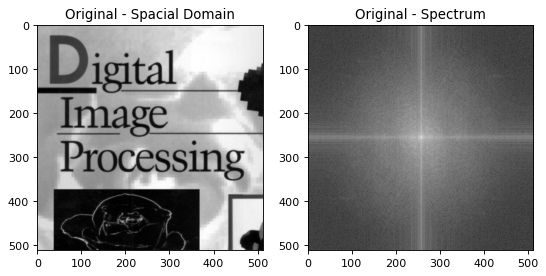

In [10]:
img_size = (512, 512)
img1 = load_image('DIPcover_pt2.bmp')
img1 = cv2.resize(img1, img_size, interpolation = cv2.INTER_AREA)
# print(img1[np.max(img1,keepdims=True)])
# print(img1[np.min(img1,keepdims=True)])

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.subplot(121)
plt.title("Original - Spacial Domain")
plt.imshow(img1, cmap='gray');


FFT1 = image_fft(img1)
display_fft = np.log(1 + abs(FFT1))
# plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.subplot(122)
plt.title("Original - Spectrum")
plt.imshow(display_fft, cmap='gray');

In [4]:
def get_mag_and_phase(matrix, imaginary=False):
    output_magnitude = np.zeros(matrix.shape)
    output_phase_angle = np.zeros(matrix.shape, dtype=complex)
    for y in range(matrix.shape[1]):
        for x in range(matrix.shape[0]):
            real = matrix[x][y].real
            imag = matrix[x][y].imag
            output_magnitude[x][y] = math.sqrt(real ** 2 + imag ** 2)
            tmp_atan = math.atan2(imag, real) * (180 / math.pi)
            if imaginary:
                output_phase_angle[x][y] = complex(1, tmp_atan)
            else:
                output_phase_angle[x][y] = tmp_atan
    return output_magnitude, output_phase_angle

In [5]:
magnitude, imag_phase_angle = get_mag_and_phase(FFT1, imaginary=True)

In [6]:
#display_mag = abs(image_ifft(magnitude))#.real.astype(int)
display_mag = image_ifft(magnitude).real.astype(int)
#display_mag = magnitude
# print(np.max(display_mag))
# print(np.min(display_mag))

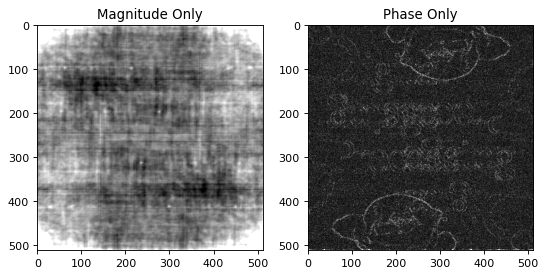

In [7]:
display_phase = abs(image_ifft(imag_phase_angle))
# display_phase = image_ifft(imag_phase_angle).real.astype(int)
# display_phase = display_phase * 255
# ifft_phase = image_ifft(imag_phase_angle)

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.subplot(121)
plt.title("Magnitude Only")
plt.imshow(display_mag, cmap='gray', vmin=0, vmax=250);

plt.subplot(122)
#plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title("Phase Only")
plt.imshow(display_phase, cmap='gray', vmin=0, vmax=1);

# print(np.max(display_phase))
# print(np.min(display_phase))
